In [12]:
import pandas as pd

df = pd.read_csv("Student_Satisfaction_Survey.csv", encoding="latin1")
df.head()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


In [13]:
df.columns

Index(['SN', 'Total Feedback Given', 'Total Configured', 'Questions',
       'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4',
       'Weightage 5', 'Average/ Percentage', 'Course Name ', 'Basic Course'],
      dtype='object')

In [14]:
df.columns = df.columns.str.strip()
df = df.drop(columns=["SN"])
df.head()

,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Total Feedback Given  580 non-null    int64 
 1   Total Configured      580 non-null    int64 
 2   Questions             580 non-null    object
 3   Weightage 1           580 non-null    int64 
 4   Weightage 2           580 non-null    int64 
 5   Weightage 3           580 non-null    int64 
 6   Weightage 4           580 non-null    int64 
 7   Weightage 5           580 non-null    int64 
 8   Average/ Percentage   580 non-null    object
 9   Course Name           580 non-null    object
 10  Basic Course          580 non-null    object
dtypes: int64(7), object(4)
memory usage: 50.0+ KB


In [17]:
df["Average_Score"] = df["Average/ Percentage"].str.split("/").str[0].astype(float)

df[["Average/ Percentage", "Average_Score"]].head()

,Average/ Percentage,Average_Score
0,3.00 / 60.00,3.0
1,5.00 / 100.00,5.0
2,5.00 / 100.00,5.0
3,3.00 / 60.00,3.0
4,4.00 / 80.00,4.0


In [18]:
question_avg = (
    df.groupby("Questions")["Average_Score"]
    .mean()
    .sort_values(ascending=False)
)
question_avg

,Average_Score
Questions,
Fairness of the internal evaluation process by the teachers.,4.215517
How well were the teachers able to communicate?,4.197241
How well did the teachers prepare for the classes?,4.090000
The teachers illustrate the concepts through examples and applications.,4.067241
"Teachers inform you about your expected competencies, course outcomes and program\noutcomes.",3.979655
How much of the syllabus was covered in the class?,3.953103
Was your performance in assignments discussed with you?,3.910345
Teachers encourage you to participate in extracurricular activities.,3.900690
"Efforts are made by the institute/ teachers to inculcate soft skills, life skills and employability skills to make you ready for the world of work.",3.853103


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


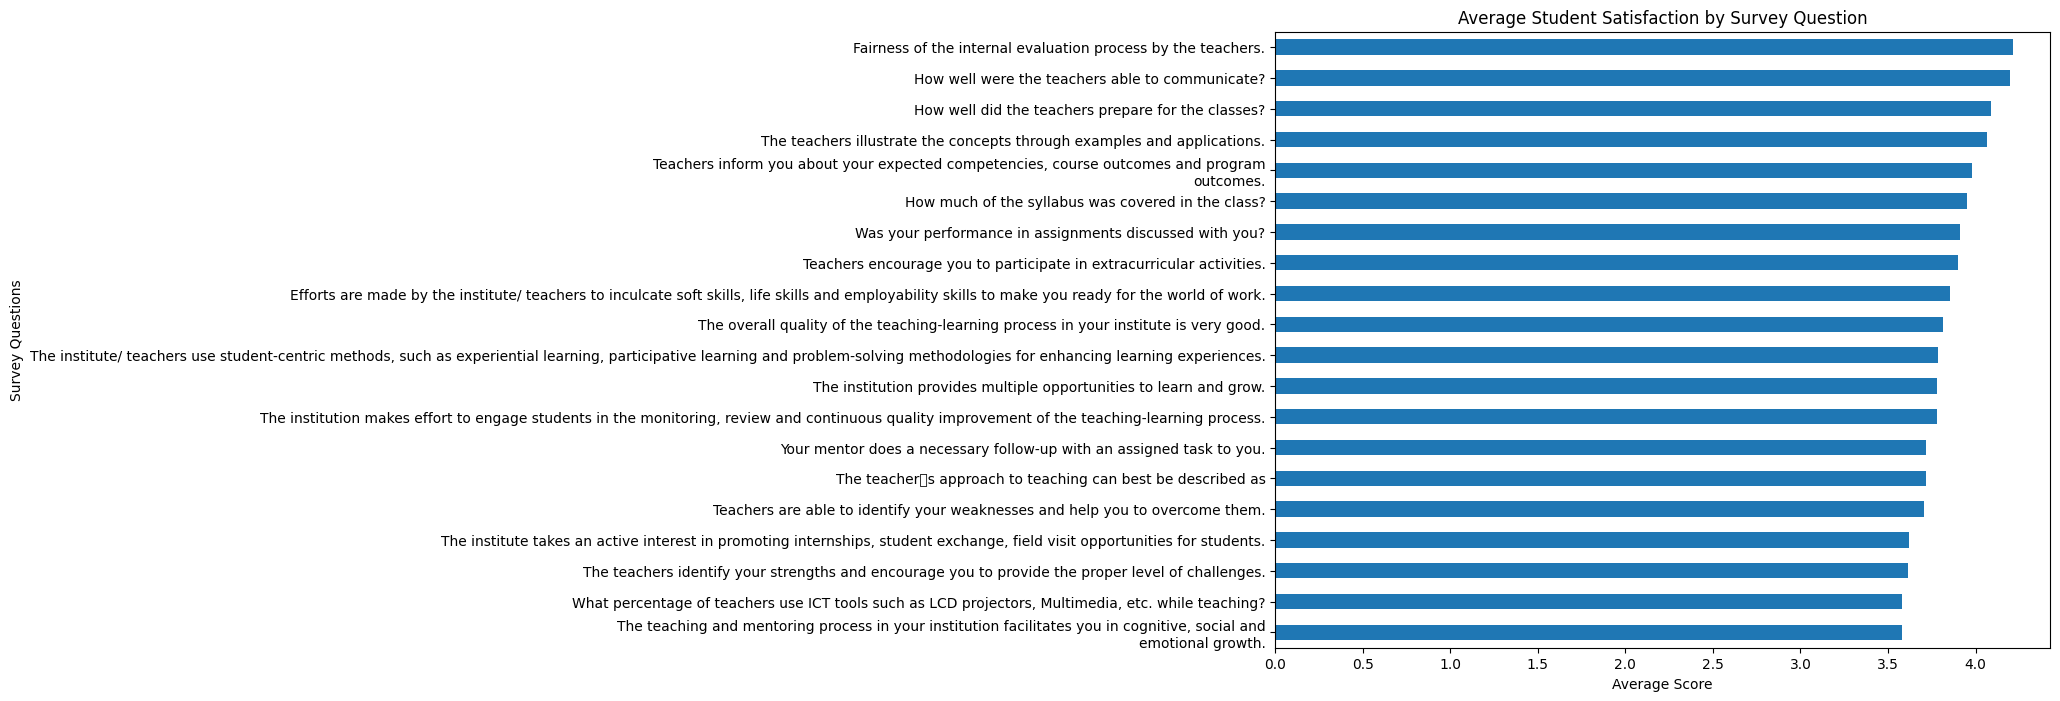

In [19]:
import matplotlib.pyplot as plt
question_avg.plot(kind="barh", figsize=(10, 8))
plt.title("Average Student Satisfaction by Survey Question")
plt.xlabel("Average Score")
plt.ylabel("Survey Questions")
plt.gca().invert_yaxis()
plt.show()

In [20]:
top_strengths = question_avg.head(5)
improvement_areas = question_avg.tail(5)

top_strengths, improvement_areas

(Questions
 Fairness of the internal evaluation process by the teachers.                                    4.215517
 How well were the teachers able to communicate?                                                 4.197241
 How well did the teachers prepare for the classes?                                              4.090000
 The teachers illustrate the concepts through examples and applications.                         4.067241
 Teachers inform you about your expected competencies, course outcomes and program\noutcomes.    3.979655
 Name: Average_Score, dtype: float64,
 Questions
 Teachers are able to identify your weaknesses and help you to overcome them.                                                  3.704828
 The institute takes an active interest in promoting internships, student exchange, field visit opportunities for students.    3.618966
 The teachers identify your strengths and encourage you to provide the proper level of challenges.                             3.615172
 W